# dataset link: https://www.kaggle.com/uciml/pima-indians-diabetes-database


In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing dataset
dataset='diabetes.csv'
df=pd.read_csv(dataset)

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
##Splitting to training and testing
X=df.drop('Outcome', axis=1)
y=df['Outcome']

In [6]:
##Splitting to training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)
print(X_train.shape)
print(y_test.shape)

(460, 8)
(308,)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

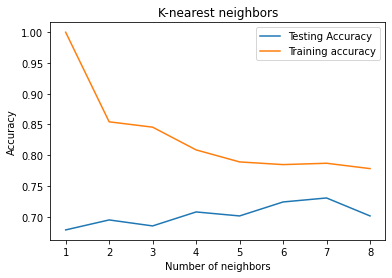

In [9]:
plt.title('K-nearest neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [10]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7305194805194806

In [11]:
from sklearn.metrics import confusion_matrix
y_predict = knn.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[165,  36],
       [ 47,  60]])

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       201
           1       0.62      0.56      0.59       107

    accuracy                           0.73       308
   macro avg       0.70      0.69      0.70       308
weighted avg       0.73      0.73      0.73       308

